## Importação das Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Extração dos Dados

In [2]:
dataframe = pd.read_csv(r'C:\7DaysOfCode\emprestimos_dia2.csv')
dataframe = dataframe.drop(columns={'Unnamed: 0'}, axis=1)

## Alteração das Colunas Datetime

In [3]:
dataframe[['data_renovacao', 'data_emprestimo', 'data_devolucao']] = dataframe[['data_renovacao', 'data_emprestimo', 'data_devolucao']].apply(pd.to_datetime)
dataframe[['data_renovacao', 'data_emprestimo', 'data_devolucao']]

,data_renovacao,data_emprestimo,data_devolucao
0,NaT,2010-01-04 07:44:10.721,2010-01-05 16:26:12.662
1,NaT,2010-01-04 07:44:10.750,2010-01-12 07:34:13.934
2,2010-01-26 08:07:01.738,2010-01-04 08:08:44.081,2010-02-25 07:36:25.800
3,2010-01-18 11:07:46.470,2010-01-04 08:24:21.284,2010-02-03 08:58:45.692
4,2010-01-19 15:59:26.464,2010-01-04 08:27:33.569,2010-02-03 13:06:30.662
...,...,...,...
2072517,NaT,2020-05-05 19:51:06.059,2021-05-13 14:53:31.000
2072518,NaT,2020-05-05 19:51:06.135,2021-05-13 14:53:38.000
2072519,NaT,2020-05-05 19:51:06.164,2021-05-13 15:01:46.000
2072520,NaT,2020-06-09 11:54:02.669,2021-07-21 15:33:55.000


## Total de Empréstimos e Total de Exemplares Emprestados

In [4]:
total_emprestimos = len(dataframe['id_emprestimo'].drop_duplicates())
total_emprestimos

2068724

In [5]:
total_exemplares = len(dataframe['id_emprestimo'])
total_exemplares

2072522

## Tabela e Gráfico dos Empréstimos por Ano

,id_emprestimo
data_emprestimo,
2010,161394
2011,196390
2012,221365
2013,234749
2014,219189
2015,213582
2016,215900
2017,218462
2018,194080


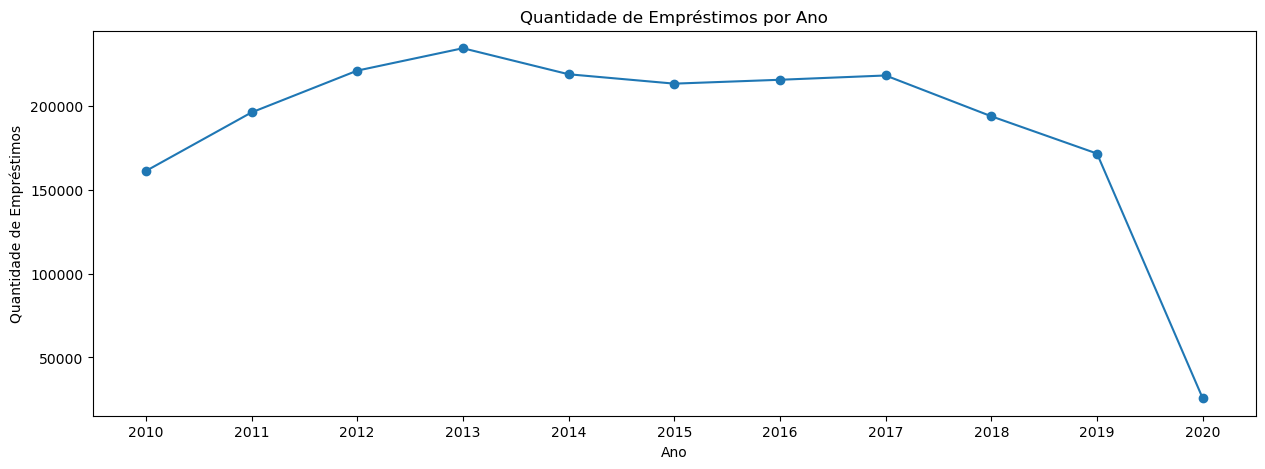

In [6]:
emprestimos_anuais = dataframe.groupby(pd.DatetimeIndex(dataframe['data_emprestimo']).year)['id_emprestimo'].count().to_frame()
display(emprestimos_anuais)

plt.figure(figsize=(15, 5))
plt.plot(emprestimos_anuais.index, emprestimos_anuais['id_emprestimo'], marker='o')
plt.ylabel('Quantidade de Empréstimos')
plt.xlabel('Ano')
plt.title('Quantidade de Empréstimos por Ano')
plt.xticks(emprestimos_anuais.index)
plt.show()

Analisando as informações podemos concluir que nos anos de 2011 a 2013, a quantidade de emprestimos teve um crescimento considerável.

Já nos anos de 2014 e 2015, o número de emprestimos teve uma ligeira queda, voltando a subir até o ano de 2017.

O número de emprestimos caiu bastante nos anos de 2018 e 2019.

A análise do ano de 2020 não pode ser feita de forma exata, pois as informações foram disponibilizadas parcialmente. Porém a queda no começo do ano em comparção com o começo dos outros anos pode ter relação com o início da pandamia, em março, o que pode ter limitado bastante o número de emprestimos.

## Tabela e Gráfico dos Empréstimos por Mês

,id_emprestimo
data_emprestimo,
janeiro,67514
fevereiro,210200
março,252185
abril,208725
maio,202530
junho,138123
julho,123790
agosto,232793
setembro,208234


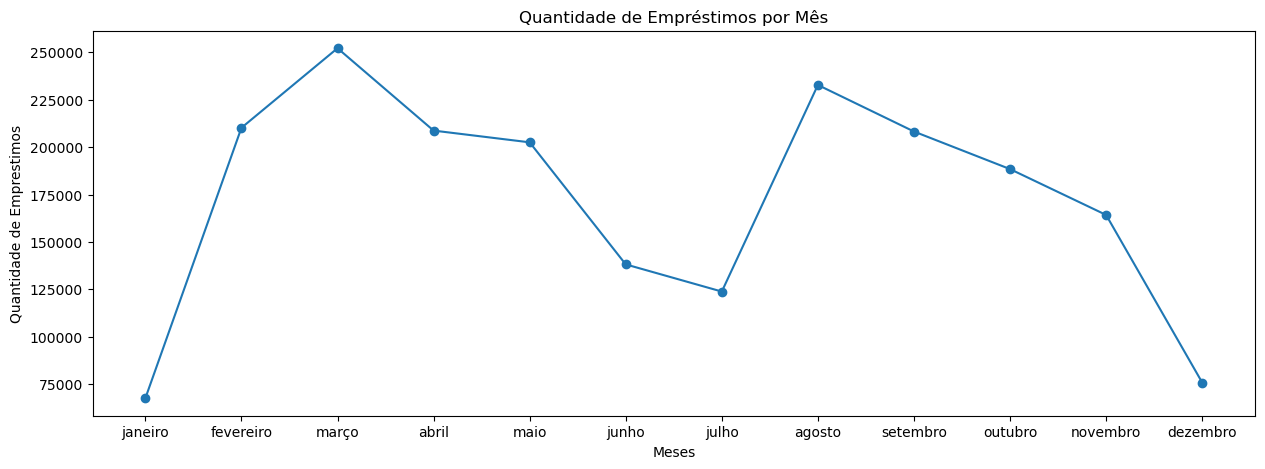

In [7]:
meses = {1: 'janeiro', 2: 'fevereiro', 3: 'março', 4:'abril', 5:'maio', 6:'junho', 7:'julho', 8:'agosto',9: 'setembro', 10:'outubro', 11:'novembro', 12:'dezembro'}

emprestimos_mensais = dataframe.groupby(pd.DatetimeIndex(dataframe['data_emprestimo']).month)['id_emprestimo'].count().to_frame()

emprestimos_mensais.index = emprestimos_mensais.index.map(meses)
display(emprestimos_mensais)

plt.figure(figsize=(15, 5))
plt.plot(emprestimos_mensais, marker='o')
plt.ylabel('Quantidade de Emprestimos')
plt.xlabel('Meses')
plt.title('Quantidade de Empréstimos por Mês')
plt.show()

Com base no gráfico, podemos assumir os meses com a maior quantidade de empréstimos são Março e Agosto.
Já os meses com menor número de empréstimos são Janeiro, Julho e Dezembro. Esses meses serão os ideais para fazer a programação de férias dos colaboradores.

Existe uma queda na quantidade dos empréstimos no mês de junho que pode ocorrer devido a anteceder o mês de férias dos estudantes da universidade, diminuindo consideravelmente o número de visitas a biblioteca. Porém é preciso ser feita uma investigação mais detalhada do caso.

## Tabela e Gráfico de Empréstimos por Hora do Dia

,id_emprestimo
data_emprestimo,
0,17
6,14
7,18777
8,103416
9,131273
10,185839
11,180048
12,148754
13,126987


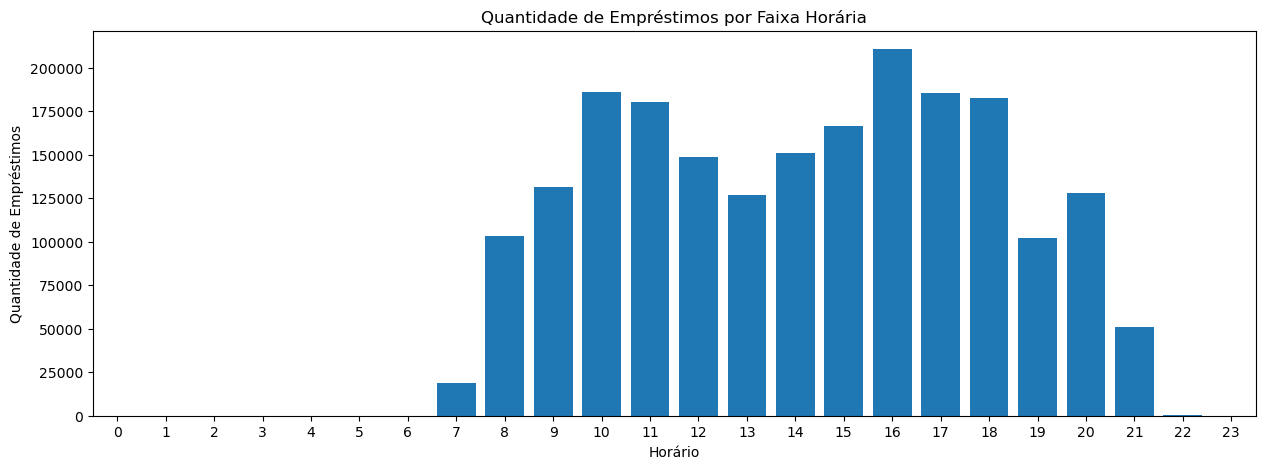

In [8]:
emprestimos_hora = dataframe.groupby(pd.DatetimeIndex(dataframe['data_emprestimo']).hour)['id_emprestimo'].count().to_frame()
display(emprestimos_hora)

plt.figure(figsize=(15, 5))

horas = list(range(24))
emprestimos_hora = emprestimos_hora.reindex(horas, fill_value=0)

plt.bar(emprestimos_hora.index, emprestimos_hora['id_emprestimo'], width=0.8)
plt.ylabel('Quantidade de Empréstimos')
plt.xlabel('Horário')
plt.xticks(horas)
plt.xlim(-0.5, 23.5)
plt.title('Quantidade de Empréstimos por Faixa Horária')
plt.show()


Com esse gráfico, podemos concluir que o intervalo com o maior número de empréstimos está entre 10:00h e 16:00h.
Portanto os melhores horários para realizar atividades e que não iram interferir no atendimento dos empréstimos são:

    - Turno da manhã, entre 07:00h e 09:00h;
    - Turno da noite, entre 19:00 e 22:00h.
    

In [9]:
dataframe.to_csv(r'C:\7DaysOfCode\emprestimos_dia3.csv')